In [46]:
#install.packages("pacman")
pacman::p_load(tidyverse,ggplot2,Synth,SCtools,scpi)
# Standard package by the inventor of synthetic controls https://cran.r-project.org/web/packages/Synth/index.html
pacman::p_load(Synth,SCtools)
# More recent package https://nppackages.github.io/scpi/
pacman::p_load(scpi)
# Newest package with more recent techniques https://github.com/synth-inference/synthdid
pacman::p_load_gh("synth-inference/synthdid")

In [47]:
prisons = read.csv("prisons.csv")

In [48]:
dataprep_out <- dataprep(
  foo = prisons,
  predictors = c("poverty", "income"),
  predictors.op = "mean",
  time.predictors.prior = 1985:1993,
  special.predictors = list(
    list("bmprison", c(1988, 1990:1992), "mean"),
    list("alcohol", 1990, "mean"),
    list("aidscapita", 1990:1991, "mean"),
    list("black", 1990:1992, "mean"),
    list("perc1519", 1990, "mean")),
  dependent = "bmprison",
  unit.variable = "statefip",
  unit.names.variable = "state",
  time.variable = "year",
  treatment.identifier = 48,
  controls.identifier = c(1,2,4:6,8:13,15:42,44:47,49:51,53:56),
  time.optimize.ssr = 1985:1993,
  time.plot = 1985:2000
)

In [49]:
synth_out <- synth(data.prep.obj = dataprep_out)


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 2015107 

solution.v:
 0.07154915 0.02736536 0.8923763 5.5e-09 2.42e-08 0.008709159 7.6e-09 

solution.w:
 3.1624e-06 2.409e-07 2.1267e-06 1.84496e-05 0.3414498 5.67e-07 2.118e-07 2.353e-07 5.36e-08 0.2981352 3.819e-07 2.736e-07 1.27466e-05 8.934e-07 1.9113e-06 1.6149e-06 8.583e-07 1.13756e-05 0.3599649 1.8153e-06 2.789e-07 3.058e-07 4.3669e-06 5.491e-07 7.4e-09 1.5586e-06 1.03716e-05 9.868e-07 4.019e-07 3.65e-07 3.756e-07 8.8487e-06 5.029e-07 9.835e-07 7.0083e-06 1.03244e-05 4.9236e-06 1.1965e-06 1.7016e-06 4.911e-07 3.1e-09 5.3498e-06 1.4134e-06 0.000262627 1.2619e-06 4.661e-07 5.808e-07 6.369e-05 1.1599e-06 1.1983e-06 



In [50]:
synth.tables <- synth.tab(
    dataprep.res = dataprep.out,
    synth.res = synth.out
)
print(synth.tables)

$tab.pred
                                         Treated Synthetic Sample Mean
school.illit                              39.888   256.337     170.786
school.prim                             1031.742  2730.102    1127.186
school.med                                90.359   223.340      76.260
school.high                               25.728    63.437      24.235
school.post.high                          13.480    36.153      13.478
invest                                    24.647    21.583      21.424
special.gdpcap.1960.1969                   5.285     5.271       3.581
special.sec.agriculture.1961.1969          6.844     6.179      21.353
special.sec.energy.1961.1969               4.106     2.760       5.310
special.sec.industry.1961.1969            45.082    37.636      22.425
special.sec.construction.1961.1969         6.150     6.952       7.276
special.sec.services.venta.1961.1969      33.754    41.104      36.528
special.sec.services.nonventa.1961.1969    4.072     5.371       7.

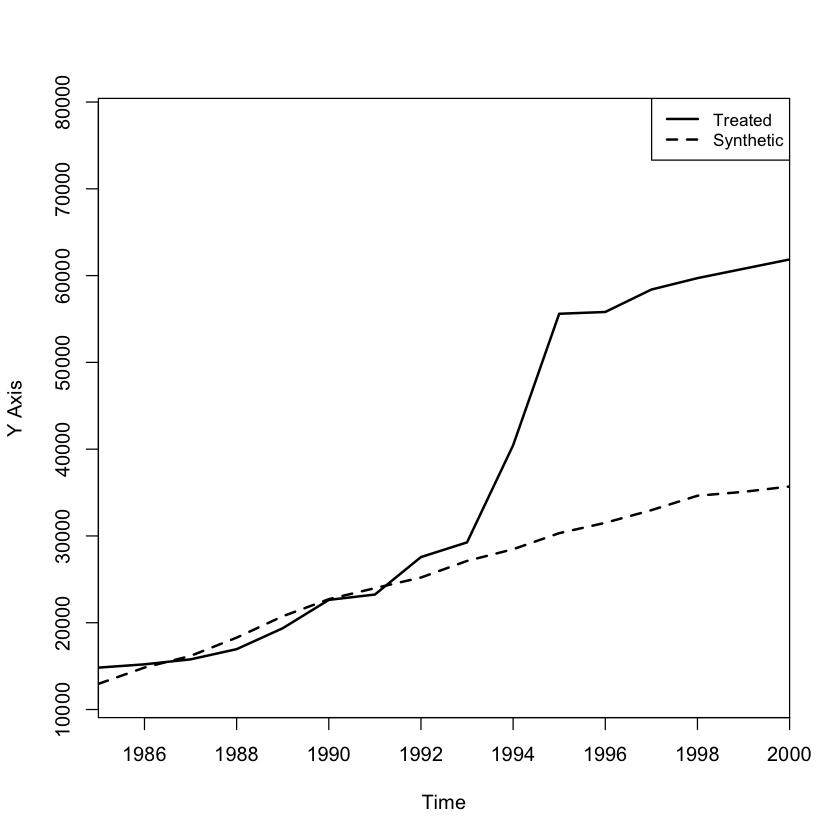

In [51]:
path.plot(synth_out, dataprep_out)

In [ ]:
gaps.plot(synth_out, dataprep_out)

In [ ]:
placebos <- generate.placebos(dataprep_out, synth_out, Sigf.ipop = 3)

plot_placebos(placebos)

mspe.plot(placebos, discard.extreme = TRUE, mspe.limit = 1, plot.hist = TRUE)

In [ ]:
data(basque)
# dataprep: prepare data for synth
dataprep.out =
    dataprep(
    foo = basque, 
    predictors= c(
        "school.illit",
        "school.prim",
        "school.med",
        "school.high",
        "school.post.high",
        "invest"
    ),
	predictors.op = c("mean"),
	dependent = c("gdpcap"),
	unit.variable = c("regionno"),
    time.variable = c("year"),
	special.predictors = list( 
        list("gdpcap",1960:1969,c("mean")), 
        list("sec.agriculture",seq(1961,1969,2),c("mean")), 
        list("sec.energy",seq(1961,1969,2),c("mean")), 
        list("sec.industry",seq(1961,1969,2),c("mean")), 
        list("sec.construction",seq(1961,1969,2),c("mean")), 
        list("sec.services.venta",seq(1961,1969,2),c("mean")), 
        list("sec.services.nonventa",seq(1961,1969,2),c("mean")), 
        list("popdens",1969,c("mean"))),
	treatment.identifier = 17,
	controls.identifier = c(2:16,18),
	time.predictors.prior = c(1964:1969),
	time.optimize.ssr = c(1960:1969),
	unit.names.variable = c("regionname"),
	time.plot = c(1955:1997)
)

In [ ]:
synth.out <- synth(data.prep.obj = dataprep.out)

In [ ]:
synth.tables <- synth.tab(
    dataprep.res = dataprep.out,
    synth.res = synth.out
)
print(synth.tables)

In [ ]:
path.plot(
    synth.res = synth.out,
    dataprep.res = dataprep.out,
    Ylab = c("real per-capita GDP (1986 USD, thousand)"),
    Xlab = c("year"),
    Ylim = c(0,13),
    Legend = c("Basque country","synthetic Basque country"),
)

In [ ]:
gaps.plot(
    synth.res = synth.out,
    dataprep.res = dataprep.out,
    Ylab = c("gap in real per-capita GDP (1986 USD, thousand)"),
    Xlab = c("year"),
    Ylim = c(-1.5,1.5),
)